In [2]:
# Goal: Create a model that can predict the salary of the employee based on his/her years of experience

# Github repo:
https://github.com/prashantnair2050/mlstreamlit_21042025

hosted app:

https://mlappcaltech.streamlit.app/ 

In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("Salary_Data.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 628.0 bytes


In [6]:
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


In [8]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [9]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [10]:
#Rules for Regression (Sklearn)
#=================================
# 1. Data must be Complete
# 2. Data must be Strictly Numeric
# 3. Ensure features and label is represented as a 2D numpy array for faster processing

In [11]:
#Seperate data as features and label

features = data.iloc[:,[0]].values
label = data.iloc[:,[1]].values

In [12]:
#Split the data as training set and test set
#In sklearn we have a class called train_test_split
#
# train_test_split() returns 4 variables
# X_train ---- training feature set
# X_test  ---- testing feature set
# y_train ---- training label set
# y_test  ---- testing label set

# training pair ---- (X_train,y_train)
# testing pair  ---- (X_test,y_test)

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(features,
                                                 label,
                                                 test_size=0.2,
                                                 random_state=30)

#Total Records in my Dataset is 100
# 80% 20% split
# 80 records ----> training set
# 20 records ----> testing set

In [13]:
#Setup Algorithm -----> LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [14]:
#Training Starts
#fit(featureData,labelData)

model.fit(X_train,y_train)

LinearRegression()

In [15]:
#
# Check the quality of the model
#
# SL (Significance Level) ------- Standard Alpha Values --------- (0.05,0.01,0.1)
#
# SL = 0.05
# CL = 1 - SL = 1 - 0.05 = 0.95 (The project is expecting atleast 95% accuracy in prediction
#
# When it comes to approving the model, always go for GENERALIZED MODEL
#
# Definition: Generalized model is a trained model that not only performs BEST on KNOWN data, but also PERFORMS BEST on UNKNOWN DATA.
#
#=================================================================================
# Guideline to identify the Generalized model (By Prashant Nair)
#=================================================================================
#
# a. Calc the evaluation score of the model for both training data and testing data
#
#        trainScore (Score generated for training Data)
#        testScore  (Score generated for testing data)
#
# b. Criteria by PN
#
#        if testScore > trainScore and testScore >= CL:
#                              Approve the model
#        else:
#                              Reject the model and start the process of improving the model
#
#
# For Regression score ---> r2 (Metric function)   | MSE(Mean Squared Error) or MAE(Mean Absolute Error) ---- (Error Function)

In [16]:
trainScore = model.score(X_train,y_train)
testScore = model.score(X_test,y_test)

In [17]:
print(f"Test Score is {testScore} and Train Score is {trainScore}")

Test Score is 0.9944092048209745 and Train Score is 0.9400496694274887


In [18]:
#Model Exploration Phase -------- Dr AI Strange

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

CL = 0.95

for seed in range(1,100):
  X_train,X_test,y_train,y_test = train_test_split(features,
                                                 label,
                                                 test_size=0.2,
                                                 random_state=seed)
  model = LinearRegression()
  model.fit(X_train,y_train)
  trainScore = model.score(X_train,y_train)
  testScore = model.score(X_test,y_test)

  if testScore > trainScore and testScore >= CL:
    print(f"Test Score is {testScore} and Train Score is {trainScore} for Random Seed {seed}")




Test Score is 0.9695039421049821 and Train Score is 0.9545249190394051 for Random Seed 3
Test Score is 0.9631182154839476 and Train Score is 0.9528197369259258 for Random Seed 8
Test Score is 0.9816423482070253 and Train Score is 0.9494673013344646 for Random Seed 10
Test Score is 0.9606215790278543 and Train Score is 0.9527636176933665 for Random Seed 14
Test Score is 0.9835849730044816 and Train Score is 0.9460054870434312 for Random Seed 26
Test Score is 0.9636425773684423 and Train Score is 0.9527636606684406 for Random Seed 27
Test Score is 0.9944092048209745 and Train Score is 0.9400496694274887 for Random Seed 30
Test Score is 0.9778242092591888 and Train Score is 0.9486350116716654 for Random Seed 37
Test Score is 0.972479448737762 and Train Score is 0.9473317052697812 for Random Seed 38
Test Score is 0.9928344802911048 and Train Score is 0.9492886917497556 for Random Seed 39
Test Score is 0.9802519469633169 and Train Score is 0.9491742100347064 for Random Seed 41
Test Score is

In [19]:

#1. Which algo for which situation in Supervised Learning? ---> label is cont(Regression) | label is categorical(Classification)
#2. Does shuffling of data impact the model quality? ---------> YES
#3. Can you use the above to your benefit to get the best possible model? ---> YES by playing with random_state parameter
#4. How to identify a GENERALIZED model? ------------------------------------> Refer Guideline given by PN or ask your DS/DExpert


In [20]:
X_train.ndim

2

In [21]:
#Test App

yExperience = float(input("Enter years of experience: "))

salary = model.predict(np.array([[yExperience]]))

print(f"Salary predicted by Dr Strange for {yExperience} of experience is $ {salary}")

Salary predicted by Dr Strange for 5.0 of experience is $ [[73060.82254366]]


In [22]:
#Save the model

import pickle
pickle.dump(model, open("SalaryPredictor.mdl" ,'wb'))

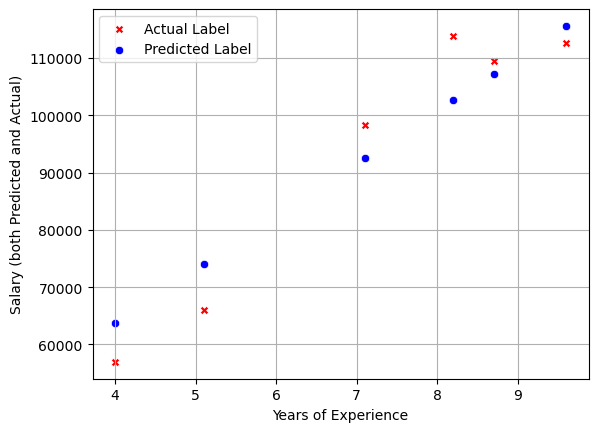

In [23]:
#Plotting X_test vs y_test and y_pred
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
sns.scatterplot(x=X_test.ravel(), y=y_test.ravel(), color='red', marker='X', label="Actual Label")
sns.scatterplot(x=X_test.ravel(), y=y_pred.ravel(), color='blue', label="Predicted Label")

plt.xlabel("Years of Experience")
plt.ylabel("Salary (both Predicted and Actual)")

plt.legend()

plt.grid(True)
plt.show()

In [24]:
import sklearn
sklearn.__version__


'1.5.1'

In [25]:
np.__version__

'1.26.4'

In [26]:
!pip install -q streamlit

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aext-panels 4.1.0 requires anaconda-cloud-auth>=0.7.1, which is not installed.
aext-core 4.1.0 requires anaconda-cloud-auth>=0.7.1, which is not installed.
aext-toolbox 4.1.0 requires anaconda-cloud-auth>=0.7.1, which is not installed.
aext-shared 4.1.0 requires anaconda-cloud-auth>=0.7.1, which is not installed.
aext-panels-server 4.1.0 requires anaconda-cloud-auth>=0.7.1, which is not installed.
aext-assistant-server 4.1.0 requires anaconda-cloud-auth>=0.7.1, which is not installed.
aext-share-notebook-server 4.1.0 requires anaconda-cloud-auth>=0.7.1, which is not installed.
spyder 5.5.1 requires ipython!=8.17.1,<9.0.0,>=8.13.0; python_version > "3.8", but you have ipython 9.1.0 which is incompatible.


In [27]:
%%writefile app.py

import numpy as np
import streamlit as st
import pickle

model = pickle.load(open('SalaryPredictor.mdl','rb'))
st.title("Salary Predictor")
yExperience = np.array([[float(st.text_input("Enter Years of Experience: ","1"))]])

sal = model.predict(yExperience)

st.write(f'Hello, *World!* :sunglasses: . Predicted Salary for {yExperience} years of eXperenience is $ {sal}')

Writing app.py


In [28]:
!npm install localtunnel

m#########⠂⠂⠂⠂⠂⠂⠂⠂⠂) ⠇ idealTree: timing idealTree Completed in 645ms
up to date, audited 770 packages in 37s

39 packages are looking for funding
  run `npm fund` for details

72 vulnerabilities (1 low, 28 moderate, 35 high, 8 critical)

To address issues that do not require attention, run:
  npm audit fix

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.
npm notice 
npm notice New major version of npm available! 10.5.0 -> 11.3.0
npm notice Changelog: https://github.com/npm/cli/releases/tag/v11.3.0
npm notice Run npm install -g npm@11.3.0 to update!
npm notice 


In [32]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 172.56.234.54


In [34]:
# !streamlit run app.py &>/content/logs.txt & npx localtunnel --port 8501 #to run in google colab
!streamlit run app.py & npx localtunnel --port 8501

your url is: https://great-regions-write.loca.lt

  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.12.157:8501

^C
